# Machine Learning Basics: Gradient Descent for Regression using Numpy

## Problem Statement:

Consider a quadratic equation of the form:

$$
y = a \cdot x^2 + b \cdot x + c
$$

Where:
- `y` is the observed output.
- `x` is the input variable.
- `a`, `b`, and `c` are the unknown coefficients we need to determine.

### Given:
We are provided with a dataset of input values `x` and their corresponding observed outputs `y`. Our goal is to find the coefficients `a`, `b`, and `c` that best fit this data.

### Objective:
To estimate the values of `a`, `b`, and `c`, we aim to minimize the difference between the observed outputs and the predicted values of the quadratic equation. This can be achieved by using **Gradient Descent**, a powerful optimization algorithm. By iteratively adjusting the coefficients to reduce the error, we can approximate the solution to this quadratic equation.

This method not only provides a numerical solution but also highlights the utility of optimization techniques like gradient descent in solving real-world mathematical problems. In the following sections, we will implement this approach step by step, visualize the results, and understand how the algorithm converges to the solution.

                      1. Initialize Parameters

                      2. Compute Predicted Values

                      3. Calculate the Loss

                      4. Apply the Chain Rule

                      5. Compute Gradients

                      6. Update the Parameters

                      7. Display the Results

                      8. Visualize the Predictions


### Initialize Parameters

To begin solving the quadratic equation, we first initialize the coefficients `a`, `b`, and `c` with random values from a standard normal distribution. Additionally, we assign a very small value to the `learning_rate`, which controls the step size in the gradient descent algorithm.

```python

# Initialize the coefficient `a` with a random value from a normal distribution
a = np.random.randn()  # `np.random.randn()` generates a random number from a standard normal distribution (mean=0, std=1)

# Initialize the coefficient `b` with a random value from a normal distribution
b = np.random.randn()  # Similar to `a`, this generates a random value for `b` using a normal distribution

# Initialize the coefficient `c` with a random value from a normal distribution
c = np.random.randn()  # Similar to `a` and `b`, this generates a random value for `c`

# Set the learning rate
learning_rate = 1e-6  # A small value to control the step size in gradient descent


### Compute Predicted Values
With above mentioned random values, we will calculate Y_Pred with the following equation
$$ Y_Pred = a \cdot X^2 + b \cdot X + c $$

### Calculate the Loss

The **loss function** measures the error between the actual values (`y`) and the predicted values (`Y_Pred`). It is essential for gradient descent, as it helps us compute the gradients needed to update the parameters. A common choice for the loss function is the **Mean Squared Error (MSE)**.

The formula for the loss function is:

$$
Loss = \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - Y_{\text{Pred},i} \right)^2
$$

Where:
- \(n\): Number of data points.
- \(y_i\): Actual observed value for the \(i^{th}\) data point.
- \(Y_{\text{Pred},i}\): Predicted value for the \(i^{th}\) data point, calculated as:
  \[
  Y_{\text{Pred},i} = a \cdot x_i^2 + b \cdot x_i + c
  \]

By minimizing this loss function, we can find the optimal values for the parameters \(a\), \(b\), and \(c\).

In Python, the Mean Squared Error can be calculated using the following code:

```python
# Calculate the loss
loss = np.mean(np.square(Y_Pred - Y))  # Computes the average of the squared differences


### Apply the Chain Rule

#### What is the Chain Rule?
The **chain rule** is a fundamental concept in calculus that allows us to compute the derivative of a composite function. It helps us understand how changes in one variable affect another through intermediate relationships.

In the context of gradient descent, we use the chain rule to calculate the partial derivatives of the loss function with respect to the parameters \(a\), \(b\), and \(c\). These derivatives (gradients) tell us how each parameter influences the loss and guide us in updating the parameters to minimize the error.

---

#### Formula for the Gradients
Using the Mean Squared Error (MSE) as our loss function:

$$
Loss = \frac{1}{n} \sum_{i=1}^{n} (Y_{\text{Pred},i} - Y_i)^2
$$

Where:

$$
Y_{\text{Pred},i} = a \cdot X_i^2 + b \cdot X_i + c
$$

We need to compute the partial derivatives:

$$
\frac{\partial Loss}{\partial a}, \quad \frac{\partial Loss}{\partial b}, \quad \frac{\partial Loss}{\partial c}
$$

---

#### Mathematics Behind the Gradients

1. **Loss Function**:
   $$
   Loss = \frac{1}{n} \sum_{i=1}^{n} (Y_{\text{Pred},i} - Y_i)^2
   $$

2. **Gradient with Respect to \(a\)**:
   Using the chain rule:
   $$
   \frac{\partial Loss}{\partial a} = \frac{\partial Loss}{\partial Y_{\text{Pred}}} \cdot \frac{\partial Y_{\text{Pred}}}{\partial a}
   $$


    $$
       \frac{\partial Loss}{\partial Y_{\text{Pred}}} = \frac{2}{n} \sum_{i=1}^{n} (Y_{\text{Pred},i} - Y_i)
    $$

    $$
       \frac{\partial Y_{\text{Pred}}}{\partial a} = X_i^2
    $$

   Therefore:
   $$
   \frac{\partial Loss}{\partial a} = \frac{1}{n} \sum_{i=1}^{n} 2 \cdot (Y_{\text{Pred},i} - Y_i) \cdot X_i^2
   $$

4. **Gradient with Respect to \(b\)**:
   Similarly:
   $$
   \frac{\partial Loss}{\partial b} = \frac{\partial Loss}{\partial Y_{\text{Pred}}} \cdot \frac{\partial Y_{\text{Pred}}}{\partial b}
   $$

   - \(\frac{\partial Y_{\text{Pred}}}{\partial b} = X_i\)

   Therefore:
   $$
   \frac{\partial Loss}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} 2 \cdot (Y_{\text{Pred},i} - Y_i) \cdot X_i
   $$

5. **Gradient with Respect to \(c\)**:
   Finally:
   $$
   \frac{\partial Loss}{\partial c} = \frac{\partial Loss}{\partial Y_{\text{Pred}}} \cdot \frac{\partial Y_{\text{Pred}}}{\partial c}
   $$

   - \(\frac{\partial Y_{\text{Pred}}}{\partial c} = 1\)

   Therefore:
   $$
   \frac{\partial Loss}{\partial c} = \frac{1}{n} \sum_{i=1}^{n} 2 \cdot (Y_{\text{Pred},i} - y_i)
   $$

---

#### Intuition
By applying the chain rule, we are effectively determining the contribution of each parameter (\(a\), \(b\), \(c\)) to the loss. This helps us understand how each parameter influences the error and allows us to update the parameters in the direction that reduces the loss.

The computed gradients $$ \frac{\partial Loss}{\partial a}, \frac{\partial Loss}{\partial b}, \frac{\partial Loss}{\partial c}$$ guide the optimization process, enabling the gradient descent algorithm to converge toward the optimal values for \(a\), \(b\), and \(c\).

---

#### Python Code for Gradients
Below is the Python implementation to compute the gradients:

```python
# Compute gradients using the chain rule
grad_a = np.mean(2 * (Y_Pred - Y) * (x**2))  # Gradient with respect to a
grad_b = np.mean(2 * (Y_Pred - Y) * x)       # Gradient with respect to b
grad_c = np.mean(2 * (Y_Pred - Y))           # Gradient with respect to c


### Update the Parameters

After calculating the gradients $$\frac{\partial Loss}{\partial a}, \frac{\partial Loss}{\partial b}, \frac{\partial Loss}{\partial c}$$ using the chain rule, we update the parameters \(a\), \(b\), and \(c\) to minimize the loss. This is achieved using the **Gradient Descent Update Rule**.

#### Gradient Descent Update Rule

For each parameter, the update rule is:

$$
a = a - \text{learning rate} \cdot \frac{\partial Loss}{\partial a}
$$
$$
b = b - \text{learning rate} \cdot \frac{\partial Loss}{\partial b}
$$
$$
c = c - \text{learning rate} \cdot \frac{\partial Loss}{\partial c}
$$

Where:
\(a\), \(b\), and \(c\) are the parameters being updated.
$$\text{learning rate}$$ is a small positive value that controls the size of the parameter updates.
$$\frac{\partial Loss}{\partial a}$$
$$\frac{\partial Loss}{\partial b}$$
$$\frac{\partial Loss}{\partial c}$$

  are the gradients of the loss with respect to each parameter.

---

#### Python Code for Parameter Updates

```python
# Update parameters using gradient descent
a = a - learning_rate * grad_a  # Update a
b = b - learning_rate * grad_b  # Update b
c = c - learning_rate * grad_c  # Update c


### Display the Results

After completing all iterations of gradient descent, we can display the final values of the coefficients \(a\), \(b\), and \(c\) that define the quadratic equation. These values represent the solution found by minimizing the loss function.

#### Python Code for Displaying Results

```python
# Display the final equation
print(f'Result: y = {a:.4f} * (X**2) + {b:.4f} * X + {c:.4f}')


Counter = 0, Loss = 137.8313
Counter = 100, Loss = 62.4561
Counter = 200, Loss = 28.6476
Counter = 300, Loss = 13.4416
Counter = 400, Loss = 6.5659
Counter = 500, Loss = 3.4250
Counter = 600, Loss = 1.9626
Counter = 700, Loss = 1.2579
Counter = 800, Loss = 0.8984
Counter = 900, Loss = 0.6986
Counter = 1000, Loss = 0.5751
Counter = 1100, Loss = 0.4898
Counter = 1200, Loss = 0.4253
Counter = 1300, Loss = 0.3733
Counter = 1400, Loss = 0.3297
Counter = 1500, Loss = 0.2924
Counter = 1600, Loss = 0.2600
Counter = 1700, Loss = 0.2317
Counter = 1800, Loss = 0.2069
Counter = 1900, Loss = 0.1852
Counter = 2000, Loss = 0.1661
Counter = 2100, Loss = 0.1493
Counter = 2200, Loss = 0.1345
Counter = 2300, Loss = 0.1214
Counter = 2400, Loss = 0.1099
Counter = 2500, Loss = 0.0998
Counter = 2600, Loss = 0.0909
Counter = 2700, Loss = 0.0830
Counter = 2800, Loss = 0.0760
Counter = 2900, Loss = 0.0699
Result: y = 3.0442 * (X**2) + 1.8966 * X + 0.7437


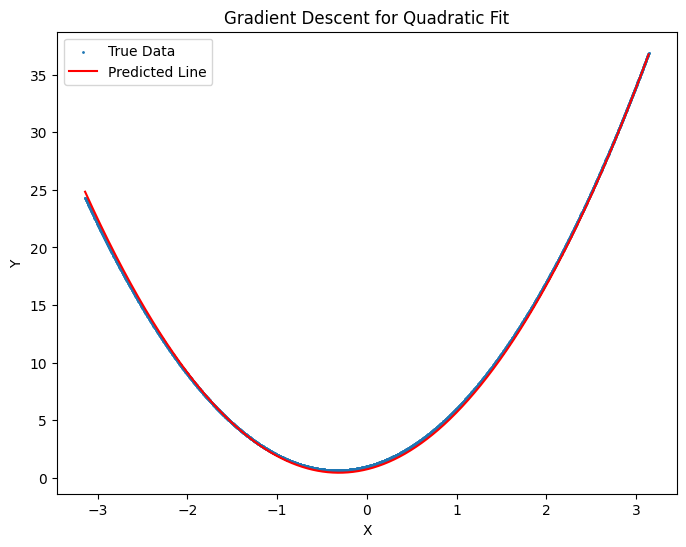

In [10]:
# Import required libraries
import numpy as np  # For numerical operations and handling arrays
import math  # For mathematical constants and functions
import matplotlib.pyplot as plt  # For plotting and visualizations

# Number of iterations (epochs) for gradient descent
epoch = 3000

# Initialize hyperparameters
learning_rate = 1e-4  # Step size for gradient descent (controls the rate of convergence)
epochs = 3000  # Total number of iterations for gradient descent

# Prepare the input (X) and target output (Y)
X = np.linspace(-math.pi, math.pi, epoch)  # Generate `epoch` evenly spaced values between -π and π
Y = 3 * (X**2) + (2 * X) + 1  # Compute the true values of Y based on a known quadratic equation

# Randomly initialize parameters a, b, and c
a = np.random.randn()  # Random initial value for coefficient `a`
b = np.random.randn()  # Random initial value for coefficient `b`
c = np.random.randn()  # Random initial value for coefficient `c`

# Perform gradient descent
for counter in range(epochs):  # Loop for the specified number of epochs
    # Calculate predictions based on the current parameters
    Y_Pred = a * (X**2) + b * X + c  # Predicted values using the quadratic equation

    # Compute the loss (Mean Squared Error)
    loss = np.mean(np.square(Y_Pred - Y))  # Average of squared differences between predicted and true values

    # Print progress every 100 iterations
    if counter % 100 == 0:
        print(f'Counter = {counter}, Loss = {loss:.4f}')  # Display the iteration number and current loss

    # Compute gradients for the parameters using the chain rule
    grad_y = 2 * (Y_Pred - Y) / len(X)  # Gradient of the loss with respect to predictions (normalized for MSE)
    grad_a = (grad_y * (X**2)).sum()  # Gradient of the loss with respect to `a`
    grad_b = (grad_y * X).sum()  # Gradient of the loss with respect to `b`
    grad_c = grad_y.sum()  # Gradient of the loss with respect to `c`

    # Update parameters using the gradient descent update rule
    a -= learning_rate * grad_a  # Update `a` by moving in the direction of negative gradient
    b -= learning_rate * grad_b  # Update `b` by moving in the direction of negative gradient
    c -= learning_rate * grad_c  # Update `c` by moving in the direction of negative gradient

# Print the final result after all epochs
print(f'Result: y = {a:.4f} * (X**2) + {b:.4f} * X + {c:.4f}')  # Display the final quadratic equation

# Plot the true values (Y) vs predicted values (Y_Pred)
plt.figure(figsize=(8, 6))  # Create a figure with specific size
plt.scatter(X, Y, s=1, label='True Data')  # Scatter plot of the true data points
plt.plot(X, Y_Pred, color='red', label='Predicted Line')  # Line plot of the predicted values
plt.title('Gradient Descent for Quadratic Fit')  # Title for the plot
plt.xlabel('X')  # Label for the X-axis
plt.ylabel('Y')  # Label for the Y-axis
plt.legend()  # Add a legend to differentiate true data from predicted line
plt.show()  # Display the plot
